<a href="https://colab.research.google.com/github/59822/Discrete_distribution/blob/main/911_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS DE 911

. Preguntas sobre la frecuencia de incidentes en el tiempo
Estas preguntas analizan el número de emergencias en distintos intervalos de tiempo.

¿Cuál es la probabilidad de que ocurran más de
𝑘
k emergencias en una hora?

Se puede modelar con
𝑋
∼
Poisson
(
𝜆
)
X∼Poisson(λ), donde
𝜆
λ es el número promedio de emergencias por hora.
Se calcula
𝑃
(
𝑋
>
𝑘
)
P(X>k) con la probabilidad acumulada.
¿Cuál es la probabilidad de que haya exactamente
𝑘
k emergencias en un día específico?

Usando
𝑋
∼
Poisson
(
𝜆
)
X∼Poisson(λ) con
𝜆
λ como el promedio diario de emergencias.
¿Cómo varía la tasa de incidentes en diferentes días de la semana o franjas horarias?

Se puede calcular
𝜆
λ para cada día/hora y ver si hay diferencias significativas.
2. Preguntas sobre ubicación de los incidentes
Estas preguntas modelan la ocurrencia de incidentes en el espacio.

¿Cuál es la probabilidad de que en un código postal (
zip
zip) ocurran más de
𝑘
k incidentes en un día?

Se puede analizar el número promedio de incidentes en cada código postal y modelarlo con Poisson.
¿Existen zonas con tasas de incidentes significativamente más altas que otras?

Se puede comparar
𝜆
λ en diferentes ubicaciones y analizar si algunas tienen una frecuencia anormalmente alta.
3. Preguntas sobre tipos de incidentes
Estas preguntas analizan el número de incidentes según su tipo.

¿Con qué frecuencia ocurren emergencias médicas (
EMS
EMS) frente a incendios (
Fire
Fire)?

Se puede modelar cada tipo de incidente con su propia
𝜆
λ y compararlos.
¿Cuál es la probabilidad de que ocurran más de
𝑘
k emergencias médicas en un día en una zona específica?

Se modela con una distribución de Poisson para
𝜆
λ en esa zona.
4. Preguntas sobre tendencias en el tiempo
Estas preguntas analizan patrones de crecimiento o disminución en la frecuencia de incidentes.

¿La tasa de emergencias ha aumentado o disminuido en los últimos años/meses?

Se puede calcular
𝜆
λ para diferentes períodos y ver si cambia significativamente.
¿Existen patrones estacionales en la frecuencia de incidentes?

Analizando
𝜆
λ en diferentes meses para detectar picos o caídas.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mchirico/montcoalert")

print("Path to dataset files:", path)

100%|██████████| 24.2M/24.2M [00:00<00:00, 28.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mchirico/montcoalert/versions/32


In [ ]:
import shutil
import os

filename = os.path.basename(path)
destiny = '/content/' + filename

if not os.path.exists(destiny):
  shutil.move(path, destiny)
  print("Was moved!")
else:
  print("File is already in road!")


Was moved!


Let's start with ECD!


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"/content/32/911.csv")
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1


In [ ]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [ ]:
# Lat : Latitud
# timeStamp : YYYY-MM-DD HH:MM:SS
# twp : Municipio
# e : No sirve


In [ ]:
df = df.drop('e', axis=1)
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST


In [ ]:
## Unique Zip::

zip_unique = df['zip'].unique()
zip_unique

array([19525., 19446., 19401.,    nan, 19044., 19426., 19438., 19462.,
       19428., 19040., 19027., 18936., 18974., 19031., 19403., 19422.,
       19085., 18964., 19038., 19406., 19468., 19010., 19095., 19464.,
       19444., 19041., 19440., 19405., 19002., 19096., 19454., 19465.,
       19004., 19066., 19072., 18041., 19046., 19090., 19012., 19025.,
       19473., 18073., 18969., 18074., 19460., 19001., 18054., 19009.,
       19006., 19035., 19150., 19075., 19034., 19151., 19453., 19003.,
       18914., 19512., 18976., 19120., 18915., 18076., 19477., 19087.,
       18966., 19131., 19128., 19083., 19053., 19475., 18960., 19504.,
       18070., 19492., 18932., 19118., 18092., 19490., 19518., 18056.,
       19119., 19107., 17752., 19111., 18927., 19435., 18951., 19472.,
       19503., 19126., 19505., 19423., 19138., 36107., 18036., 19116.,
       19139., 19129., 19115., 19355., 77316., 19457., 19082., 19127.,
       19443., 17555., 19520., 19063., 19020., 19404., 19382., 19474.,
      

In [ ]:
df.columns


Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr'], dtype='object')

In [ ]:
zip_frequent = df.groupby('zip')['zip'].count().sort_values(ascending=False).head(10)
zip_frequent

,zip
zip,
19401.0,45606
19464.0,43910
19403.0,34888
19446.0,32270
19406.0,22464
19002.0,21070
19468.0,18939
19046.0,17886
19454.0,17661


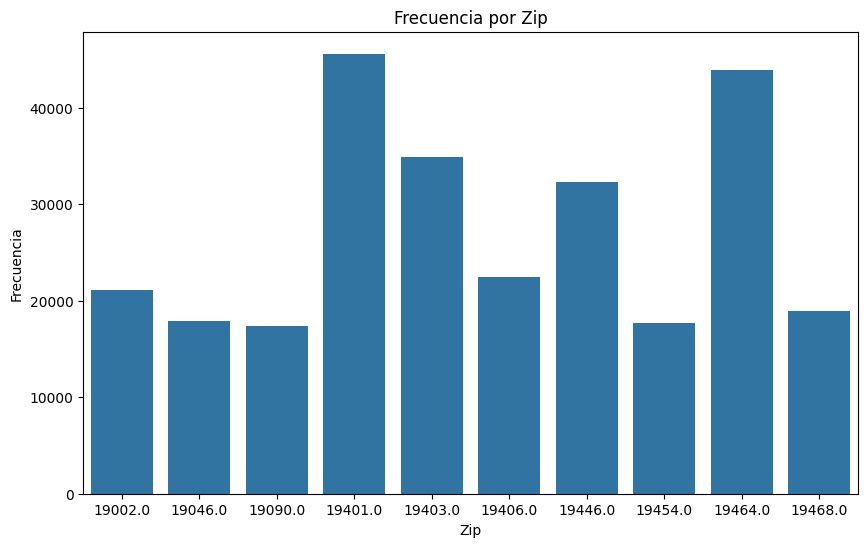

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(zip_frequent )
plt.title("Frecuencia por Zip")
plt.xlabel("Zip")
plt.ylabel("Frecuencia")

plt.show()

In [ ]:
# Modelar la cantidad de llamadas que se recibiran en cierto intervalo de 19403.0


In [ ]:
filtered_df = df[df['zip'] == 19401.0]
filtered_df

,lat,lng,desc,zip,title,timeStamp,twp,addr
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
18,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; Station 308A; ...,19401.0,EMS: VEHICLE ACCIDENT,2015-12-10 17:43:29,NORRISTOWN,PENN ST & ARCH ST
20,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; 2015-12-10 @ 17...,19401.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:43:45,NORRISTOWN,PENN ST & ARCH ST
32,40.129398,-75.332213,PINE ST & W ROBERTS ST; NORRISTOWN; Station 3...,19401.0,EMS: UNKNOWN MEDICAL EMERGENCY,2015-12-10 18:17:07,NORRISTOWN,PINE ST & W ROBERTS ST
...,...,...,...,...,...,...,...,...
663471,40.121419,-75.356817,AIRY ST & HURST ALY; NORRISTOWN; 2020-07-29 @ ...,19401.0,Fire: FIRE INVESTIGATION,2020-07-29 13:31:40,NORRISTOWN,AIRY ST & HURST ALY
663474,40.113372,-75.341397,MAIN ST & GREEN ST; NORRISTOWN; Station 308A;...,19401.0,EMS: UNKNOWN MEDICAL EMERGENCY,2020-07-29 13:33:17,NORRISTOWN,MAIN ST & GREEN ST
663481,40.115375,-75.341525,AIRY ST & DEKALB ST; NORRISTOWN; Station 308A...,19401.0,EMS: UNKNOWN MEDICAL EMERGENCY,2020-07-29 14:13:09,NORRISTOWN,AIRY ST & DEKALB ST
663500,40.119456,-75.321759,NEW HOPE ST & LINDA LN; NORRISTOWN; 2020-07-29...,19401.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:13:44,NORRISTOWN,NEW HOPE ST & LINDA LN


In [ ]:
# Analizar en

In [ ]:
# Distribucion poisson
'''Poisson: Numero de exitos en un intervalo de tiempo'''

filtered_df.dtypes

,0
lat,float64
lng,float64
desc,object
zip,float64
title,object
timeStamp,object
twp,object
addr,object


In [ ]:
filtered_df['timeStamp'] = pd.to_datetime(filtered_df['timeStamp'])
filtered_df.dtypes

<ipython-input-36-a2efff3204fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['timeStamp'] = pd.to_datetime(filtered_df['timeStamp'])


,0
lat,float64
lng,float64
desc,object
zip,float64
title,object
timeStamp,datetime64[ns]
twp,object
addr,object


In [ ]:
#Analizar, la probabilidad que existan más llamadas o algo así en diciembre

month_filter = filtered_df.groupby(filtered_df['timeStamp'].dt.month)['timeStamp'].count()
month_filter

,timeStamp
timeStamp,
1,4351
2,3771
3,4138
4,3782
5,4072
6,4195
7,4132
8,3494
9,3222


In [ ]:
import numpy as np

array_numpy_month = month_filter.to_numpy()
print(array_numpy_month)

[4351 3771 4138 3782 4072 4195 4132 3494 3222 3383 3281 3785]


In [ ]:
tasa_month  = {}
for i in range(len(array_numpy_month)):
  month= array_numpy_month[i]
  month_round = round(month/(5*31), 2)
  tasa_month[i+1] = month_round



In [ ]:
print(tasa_month)

{1: 28.07, 2: 24.33, 3: 26.7, 4: 24.4, 5: 26.27, 6: 27.06, 7: 26.66, 8: 22.54, 9: 20.79, 10: 21.83, 11: 21.17, 12: 24.42}


In [ ]:
# pd

tasa_pd = pd.DataFrame(list(tasa_month.items()), columns=['month', 'tasa'])
tasa_pd = tasa_pd.reset_index(drop=True)
tasa_pd.columns

Index(['month', 'tasa'], dtype='object')

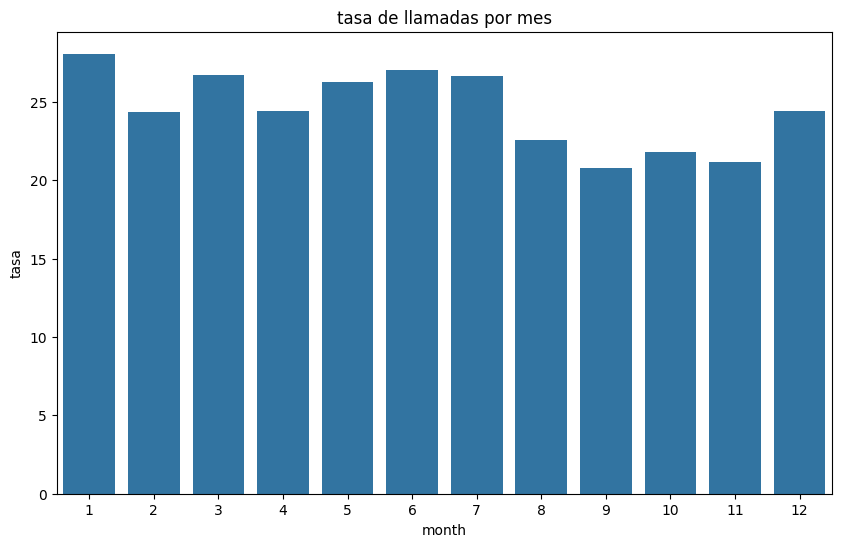

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data = tasa_pd, x= 'month', y = 'tasa')
plt.title('tasa de llamadas por mes')

plt.show()

In [ ]:
diciembre = filtered_df[filtered_df['timeStamp'].dt.month == 12]
diciembre

,lat,lng,desc,zip,title,timeStamp,twp,addr
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
18,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; Station 308A; ...,19401.0,EMS: VEHICLE ACCIDENT,2015-12-10 17:43:29,NORRISTOWN,PENN ST & ARCH ST
20,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; 2015-12-10 @ 17...,19401.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:43:45,NORRISTOWN,PENN ST & ARCH ST
32,40.129398,-75.332213,PINE ST & W ROBERTS ST; NORRISTOWN; Station 3...,19401.0,EMS: UNKNOWN MEDICAL EMERGENCY,2015-12-10 18:17:07,NORRISTOWN,PINE ST & W ROBERTS ST
...,...,...,...,...,...,...,...,...
591174,40.137047,-75.317159,DEKALB PIKE & COLONIAL DR; EAST NORRITON; Sta...,19401.0,EMS: SUBJECT IN PAIN,2019-12-31 18:17:10,EAST NORRITON,DEKALB PIKE & COLONIAL DR
591177,40.129448,-75.312010,NEW HOPE ST & SAW MILL CT; EAST NORRITON; Sta...,19401.0,EMS: GENERAL WEAKNESS,2019-12-31 18:22:21,EAST NORRITON,NEW HOPE ST & SAW MILL CT
591225,40.117892,-75.351165,MAIN ST & CHAIN ST; NORRISTOWN; Station 308A;...,19401.0,EMS: SUBJECT IN PAIN,2019-12-31 21:09:17,NORRISTOWN,MAIN ST & CHAIN ST
591234,40.116684,-75.335681,SMITH ST & E OAK ST; NORRISTOWN; Station 308A...,19401.0,EMS: RESPIRATORY EMERGENCY,2019-12-31 21:48:57,NORRISTOWN,SMITH ST & E OAK ST


In [ ]:
# total llamadas

total_diciembre = diciembre['timeStamp'].count()
print(total_diciembre) ## Total de llamadas recibidas en diciembre a lo largo de 5 años

## Para calcular la tasa de un diciembre

tasa_diciembre = (total_diciembre/(5*31))
print(f"La tasa es: {tasa_diciembre:.2f}, considerando los 5 años")

3785
La tasa es: 24.42, considerando los 5 años


In [ ]:
import scipy.stats as stats

# De tener al menos 30 llamadas
probabilidad_diciembre = stats.poisson.cdf(30, tasa_diciembre)
print(probabilidad_diciembre*100)


88.81382743442393


In [116]:
# Vamos a corroborar la información

año_2015 = filtered_df[filtered_df['timeStamp'].dt.year == 2015]
totale = año_2015['timeStamp'].count()
print(totale)

558


In [120]:
hourly_counts = filtered_df.groupby(filtered_df['timeStamp'].dt.hour)['timeStamp'].count()
#dt.hour = Extrae la hora
poisson_rate = hourly_counts.mean()/5 # x año
poisson_rate = poisson_rate/12
print("La tasa de llamadas del zip 1904.0 en una hora por mes es ",poisson_rate)

La tasa de llamadas del zip 1904.0 en una hora por mesu es  31.670833333333334


In [ ]:
hourly_counts

,timeStamp
timeStamp,
0,1300
1,1104
2,962
3,891
4,778
5,887
6,1135
7,1555
8,2058


In [ ]:
## Se espera que en una hora lleguen aproximadamente 1900.05

In [131]:
import scipy.stats as stats

probability = stats.poisson.cdf(55, poisson_rate)
print(round(probability*100,4))

99.9941


P(X = k) = (e^-λ * λ^k) / k!

# Cuantos casos deben haber para una emergencia extrema

In [134]:
import math
dsv = math.sqrt(poisson_rate)
print(f"Tasa promedio de emergencias por dia {poisson_rate}\nDesvuación estandar {dsv}")

percentil = 0.95 #Considerado día critico o extremo

z_score = stats.norm.ppf(percentil)
print(z_score)



Tasa promedio de emergencias por dia 31.670833333333334
Desvuación estandar 5.627684544582553
1.6448536269514722


In [135]:
extreme_events = poisson_rate + z_score * np.sqrt(poisson_rate)
print(f"Número de emergencias para ser un día extremo (percentil 95): {round(extreme_events)}")


Número de emergencias para ser un día extremo (percentil 95): 41


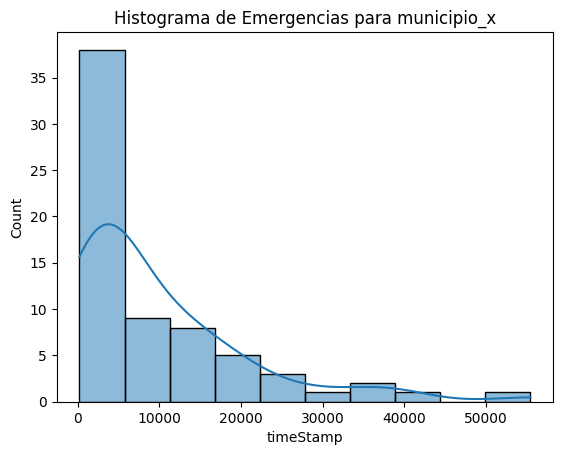

In [137]:

emergencias_por_municipio = df.groupby('twp')['timeStamp'].count()
sns.histplot(emergencias_por_municipio, kde=True)
plt.title('Histograma de Emergencias para municipio_x')
plt.show()

In [138]:
!pip install plotly==5.15.0 pandas==2.0.3 geopandas==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 73.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source